### 190648C
### VIKASITHA K.S.S.
#### ASSIGNMENT 03


# EN2550: Assignment 03 on Object Counting on a Conveyor Belt

## Connected Component Analysis

In this part, we will generate an indexed image representing connected
components in `conveyor_f101.png` image. Notice that, as there are three
square nuts and one hexagonal nut in the image, there will be five
connected components (backgound will be assigned the label 0).

1.  Open the `hexnut_template.png`, `squarenut_template.png` and
    `conveyor_f100.png` and display. This is done for you.

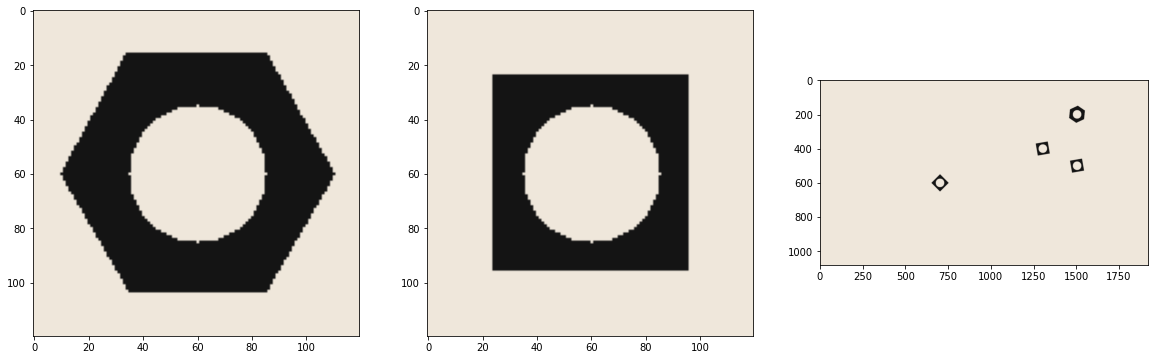

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread(r'Assignment-03 Materials\hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread(r'Assignment-03 Materials\squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread(r'Assignment-03 Materials\conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize=(20,6))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

2.  Convert the images to grayscale and apply Otsu's thresholding to
    obtain the binarized image. Do this for both the templates and belt
    images. See
    <https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html>
    for a guide. State the threshold value (automatically) selected in
    the operation. Display the output images.

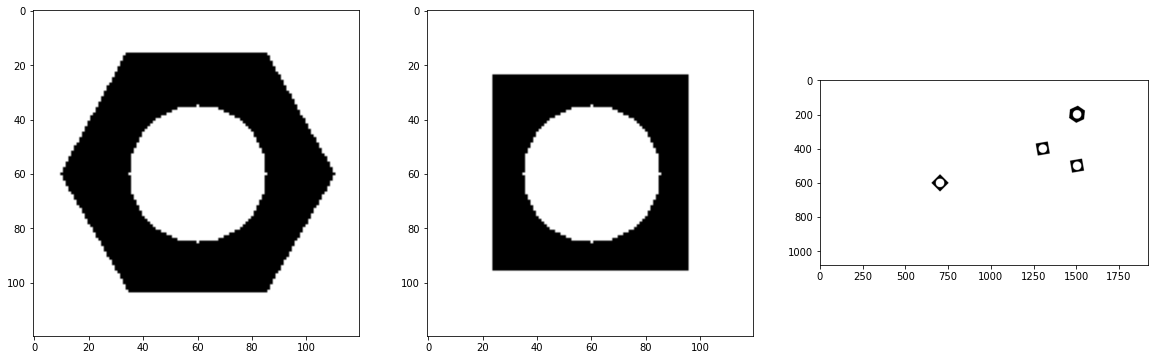

Treshold value = 20.0


In [12]:
hexnut_template = cv.cvtColor(hexnut_template,cv.COLOR_BGR2GRAY)
squarenut_template = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_f100 = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

ret1,hexnut_template = cv.threshold(hexnut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2,squarenut_template = cv.threshold(squarenut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3,conveyor_f100 = cv.threshold(conveyor_f100,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

fig, ax = plt. subplots(1,3,figsize=(20,6))
ax[0].imshow(hexnut_template, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(squarenut_template, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(conveyor_f100, cmap='gray', vmin=0, vmax=255)
plt.show()

print("Treshold value =", ret1)

3.  Carry out morphological closing to remove small holes inside the
    foreground. Use a $3 \times 3$ kernel. See
    <https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html>
    for a guide.

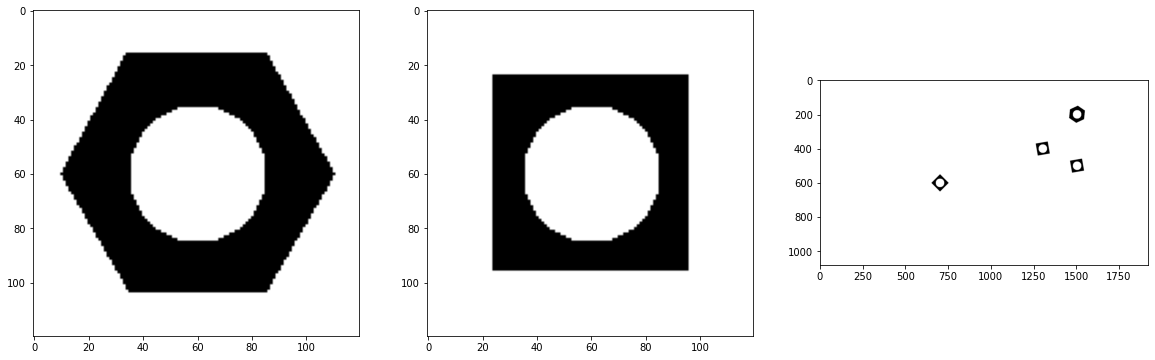

In [13]:
kernel = np.ones((3,3), np.uint8)
hexnut_template = cv.morphologyEx(hexnut_template, cv.MORPH_OPEN, kernel)
squarenut_template = cv.morphologyEx(squarenut_template, cv.MORPH_OPEN, kernel)
conveyor_f100 = cv.morphologyEx(conveyor_f100, cv.MORPH_OPEN, kernel)

fig, ax = plt. subplots(1,3,figsize=(20,6))
ax[0].imshow(hexnut_template, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(squarenut_template, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(conveyor_f100, cmap='gray', vmin=0, vmax=255)
plt.show()